In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

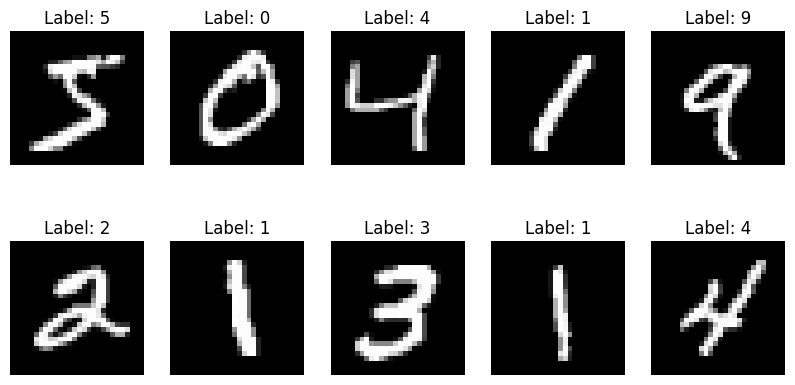

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [7]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



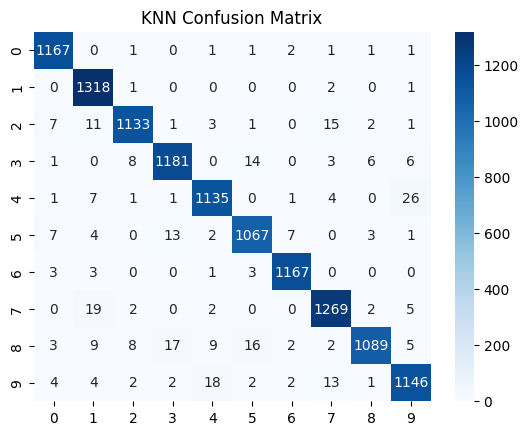

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



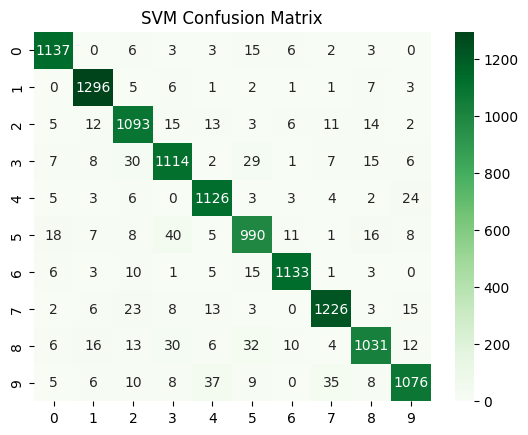

In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [10]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


Modifications

SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



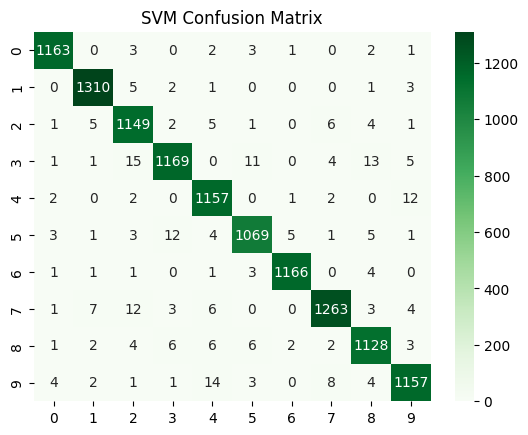

In [11]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9715
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.95      1.00      0.97      1322
           2       0.98      0.96      0.97      1174
           3       0.96      0.97      0.97      1219
           4       0.98      0.97      0.97      1176
           5       0.96      0.97      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.93      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



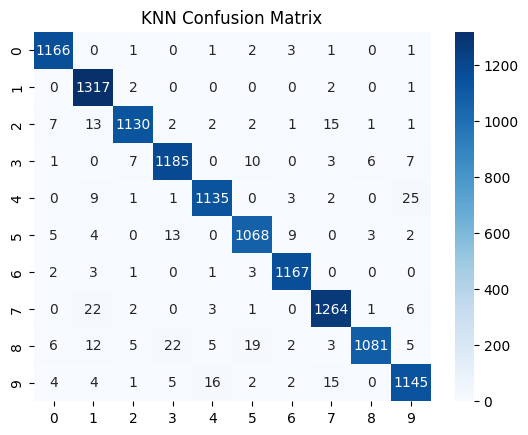

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

Decision Tree Validation Accuracy: 0.8681
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1175
           1       0.93      0.96      0.95      1322
           2       0.85      0.85      0.85      1174
           3       0.84      0.84      0.84      1219
           4       0.86      0.87      0.86      1176
           5       0.83      0.81      0.82      1104
           6       0.90      0.89      0.90      1177
           7       0.90      0.91      0.90      1299
           8       0.82      0.79      0.80      1160
           9       0.82      0.84      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



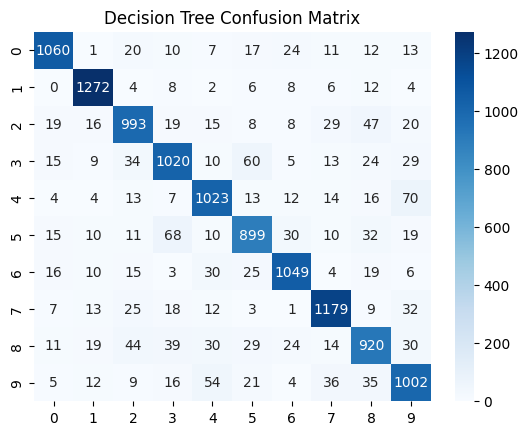

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_split, y_train_split)

y_val_pred_dt = dt_model.predict(X_val)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

Decision Tree Validation Accuracy: 0.9693
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.96      0.97      0.97      1174
           3       0.96      0.95      0.96      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.99      0.98      1177
           7       0.97      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.96      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



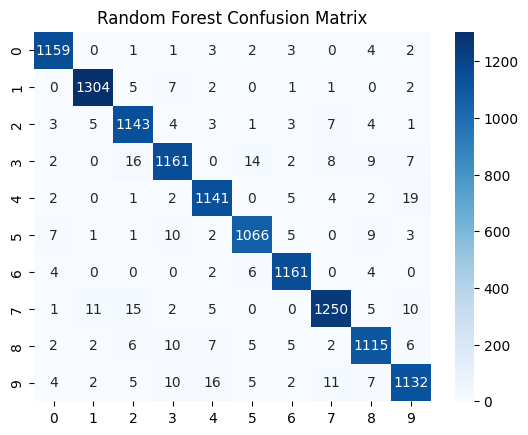

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_split, y_train_split)

y_val_pred_rf = rf_model.predict(X_val)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Decision Tree Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

KNN(3)=0.9727
KNN(4)=0.9716
KNN(5)=0.9715
KNN(7)=0.9696
SVM(linear)=0.9352
SVM(rbf)=0.9776
Decision Tree=0.8681
Random Forest=0.0.9693

In [15]:
#gridsearchCV on randowm forest and decisiontree. n_estimatro, max_depth ..XGBoost, Adaboost

GridSearchCV on random forest for n_estimator and max_depth

In [39]:
from sklearn.model_selection import GridSearchCV
# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search CV
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train_split, y_train_split)

# Best parameters and score for Random Forest
print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

# Evaluate on test set
rf_best = rf_grid_search.best_estimator_
rf_predictions = rf_best.predict(X_val)
print("Random Forest Test Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

PCA on Decision Trees

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')  # Update with the correct path
test_df = pd.read_csv('/content/test.csv')    # Update with the correct path

# Separate features and target variable
X = train_df.drop(columns=['label'])  # Replace 'target_column' with the actual name of your target column
y = train_df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components selected: {X_pca.shape[1]}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt_model.predict(X_val)

# Evaluate the model
dt_acc = accuracy_score(y_val, y_val_pred)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

PCA on KNN

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')  # Update with the correct path
test_df = pd.read_csv('/content/test.csv')    # Update with the correct path

# Separate features and target variable
X = train_df.drop(columns=['label'])  # Replace 'label' with the actual name of your target column
y = train_df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components selected: {X_pca.shape[1]}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn_model.predict(X_val)

# Evaluate the model
knn_acc = accuracy_score(y_val, y_val_pred)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


PCA on SVM(Linear)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')  # Update with the correct path
test_df = pd.read_csv('/content/test.csv')    # Update with the correct path

# Separate features and target variable
X = train_df.drop(columns=['label'])  # Replace 'label' with the actual name of your target column
y = train_df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components selected: {X_pca.shape[1]}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the model
svm_acc = accuracy_score(y_val, y_val_pred)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


PCA on SVM(rbf)

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')  # Update with the correct path
test_df = pd.read_csv('/content/test.csv')    # Update with the correct path

# Separate features and target variable
X = train_df.drop(columns=['label'])  # Replace 'label' with the actual name of your target column
y = train_df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components selected: {X_pca.shape[1]}")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train an SVM classifier with a linear kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the model
svm_acc = accuracy_score(y_val, y_val_pred)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

PCA on Random forest

In [ ]:
# Import necessary library for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model
rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Validation Accuracy: {rf_acc:.4f}')
print(classification_report(y_val, y_val_pred_rf))

# Plot the confusion matrix for Random Forest
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


Convolution Neural Networks

In [18]:
from tensorflow.keras.utils import to_categorical

X = train.drop('label', axis=1).to_numpy()
y = train['label'].to_numpy()

X = X / 255.0

X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, 10)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape,X_test.shape,Y_train.shape)

(455, 28, 28, 1) (114, 28, 28, 1) (455, 10)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [22]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer to specify the input shape
    Flatten(),                 # Flatten the input
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons
])

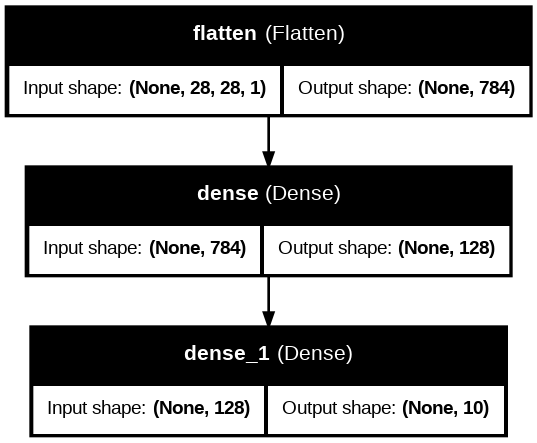

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0969 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1241 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1060 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1117 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1186 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1225 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1120 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0909 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━

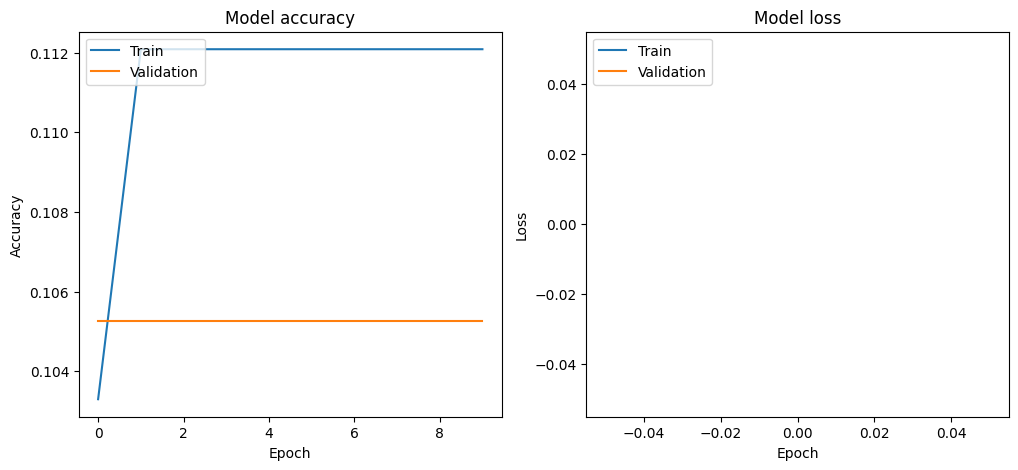

In [26]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

history_plot(history)

In [27]:
from tensorflow.keras.layers import Dropout

# Define a deeper model
model_deep = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, Y_train,
                               validation_data=(X_test, Y_test),
                               epochs=10,
                               batch_size=32)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1513 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1097 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1089 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1056 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1029 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1136 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

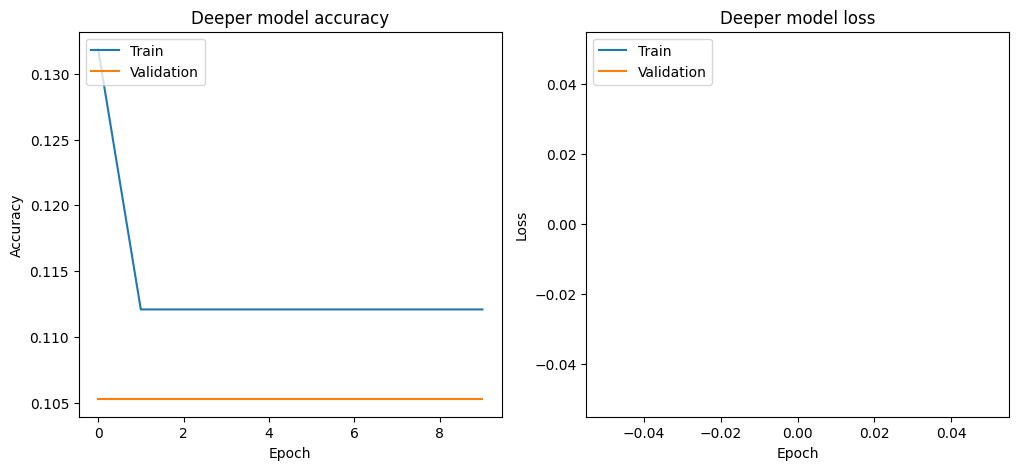

In [28]:
history_plot(history_deep, model_name='Deeper model')


In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a model with convolutional layers
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                              # Output layer
])


model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history_conv = model_conv.fit(X_train, Y_train,
                              validation_data=(X_test, Y_test),
                              epochs=10,
                              batch_size=32)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.1218 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0995 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1107 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.1201 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.1023 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.1120 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0980 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1092 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 9/10
15/15 ━━━━━━━━━━━━━━

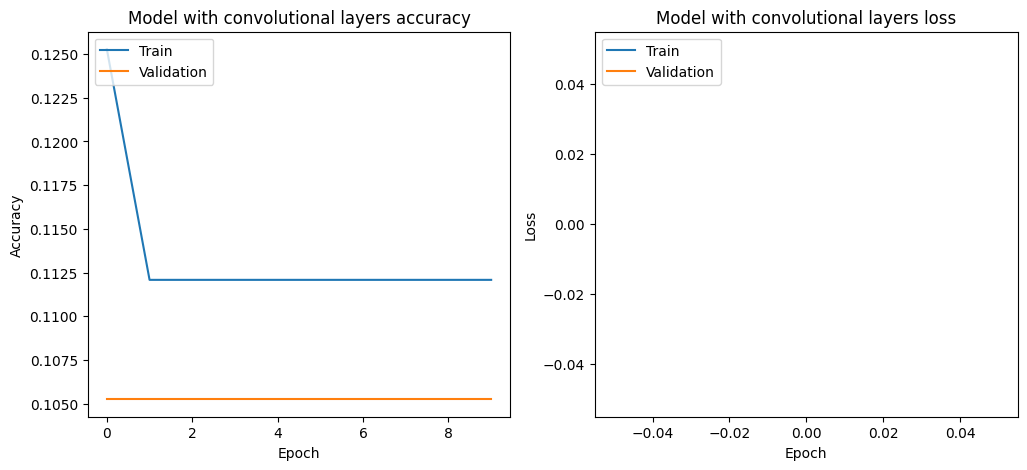

In [31]:
history_plot(history_conv, model_name='Model with convolutional layers')

In [32]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [33]:
import keras_tuner as kt

In [34]:
# Define a model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(10, activation='softmax')                                              # Output layer
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, Y_train,
                                    validation_data=(X_train, Y_train),
                                    epochs=10,
                                    batch_size=32)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.1377 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.1114 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1063 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.1061 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.1072 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.1102 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.1181 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.0896 - loss: nan - val_accuracy: 0.1121 - val_loss: nan
Epoch 9/10
15/15 ━━━━━━━━━━━

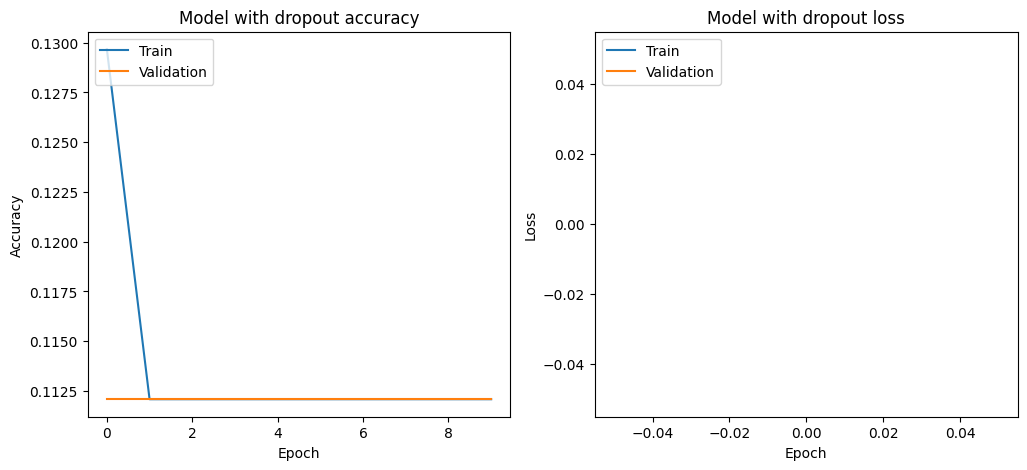

In [35]:
history_plot(history_dropout, model_name='Model with dropout')
